### **💾 Praktikum 1**

**Langkah 1 - Import Library**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

- `numpy` untuk operasi numerik, seperti manipulasi array dan komputasi linier.
- `matplotlib.pyplot` untuk membuat visualisasi data.
- `pandas` untuk membaca, memproses, dan menganalisis data dalam bentuk tabel.
- `seaborn` merupakan library visualisasi data berbasis matplotlib dengan desain yang lebih menarik.

**Langkah 2 - Load Data dan Visualisasi**

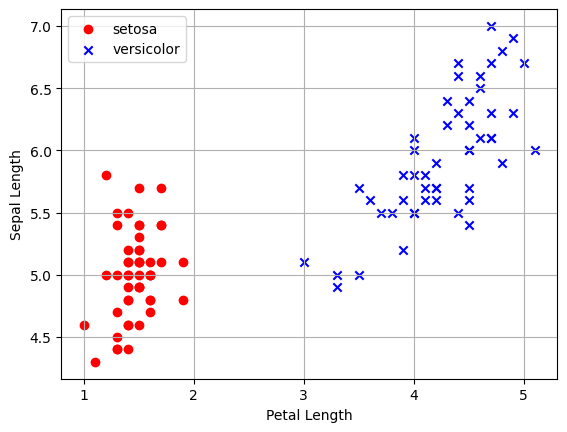

In [ ]:
df = pd.read_csv('data/iris.csv')
setosa = df[df['Species'] == 'Iris-setosa']
versicolor = df[df['Species'] == 'Iris-versicolor']
virginica = df[df['Species'] == 'Iris-virginica']

a, b = 'PetalLengthCm', 'SepalLengthCm'
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()



- `df = pd.read_csv('iris.csv', header=None)` merupakan kode untuk membaca dataset iris dari file `iris.csv` tanpa header

```python
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']
```
- memisahkan data dengan memfilter dataset menjadi tiga subset berdasarkan spesies bunga iris: setosa, versicolor, dan virginica.

```python
a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')
```
- menentukan fitur untuk plot data bunga yaitu **Petal Length** dan **Sepal Length**.
- membuat scatter plot untuk data setosa dan versicolor dengan warna dan marker berbeda

```python
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()
```
- memberikan label pada sumbu x dan y, menambahkan legenda, grid, dan menampilkan plot.



**Langkah 3 - Membuat Kelas Perceptron**

In [ ]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

```python
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
```
- **`__init__`**: Konstruktor untuk inisialisasi perceptron.
  - `eta`: Learning rate (kecepatan pembelajaran).
  - `n_iter`: Jumlah iterasi (epoch).

```python
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
```
- **`fit`**: Metode untuk melatih model.
  - **`self.w_`**: Array bobot dengan ukuran sesuai jumlah fitur + bias.
  - **`self.errors_`**: Menyimpan jumlah kesalahan pada setiap epoch.

```python
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
```
- Iterasi melalui data selama `n_iter` epoch:
  - **`update`**: Menghitung perubahan bobot berdasarkan kesalahan.
  - Memperbarui **bias** (`self.w_[0]`) dan **bobot fitur** (`self.w_[1:]`).
  - Menyimpan jumlah kesalahan (`errors`).

```python
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
```
- **`net_input`**: Menghitung input bersih (dot product antara fitur dan bobot + bias).

```python
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
```
- **`predict`**: Mengembalikan prediksi kelas berdasarkan input bersih:
  - `1` jika input ≥ 0, dan `-1` jika sebaliknya.


**Langkah 4 - Pilih Data dan Encoding Label**

In [ ]:
y = df.iloc[0:100, 5].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [1, 3]].values # slice data latih

- **`y`**: label dari 100 data awal (2 kelas: Iris-setosa dan Iris-versicolor).
  - Dikodekan menjadi `-1` untuk setosa dan `1` untuk versicolor.
- **`X`**: fitur Petal Length (kolom 1) dan Sepal Length (kolom 3) dari 100 data.

**Langkah 5 - Fitting Model**

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

- membuat objek perceptron dengan learning rate `0.1` dan `10` epoch.
- melatih model dengan data fitur `X` dan label `y`.

**Langkah 6 - Visualisasi Nilai Error Per Epoch**

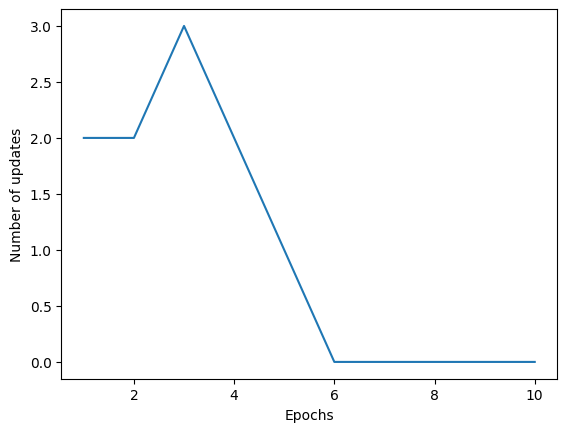

In [ ]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

- membuat grafik jumlah kesalahan (updates) pada setiap epoch.
- sumbu x: Jumlah epoch.
- sumbu y: Jumlah kesalahan.

**Langkah 7 - Visualiasasi Decision Boundary**

<ipython-input-38-4a52c9164200>:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


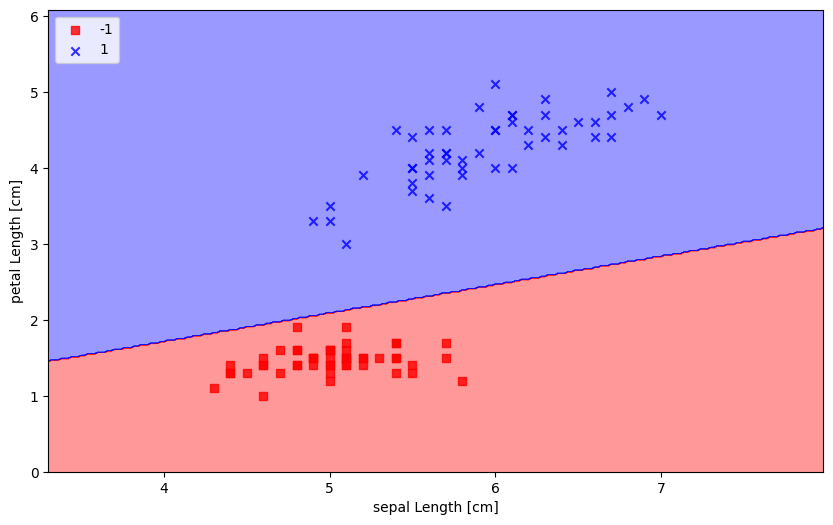

In [ ]:
# buat fungsi untuk plot decision region
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ['red', 'blue', 'green', 'k', 'grey']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

plt.figure(figsize=(10, 6))
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal Length [cm]')
plt.ylabel('petal Length [cm]')
plt.legend(loc='upper left')
plt.show()

`from matplotlib.colors import ListedColormap` merupakan kode untuk mengimport `ListedColormap` untuk membuat palet warna.

```python
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])
```
- membuat fungsi untuk memplot **decision boundary**.
- marker dan warna untuk setiap kelas.

```python
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
```
- membuat grid dua dimensi berdasarkan range fitur.

```python
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
```
- menggunakan model untuk memprediksi kelas pada setiap titik grid.

```python
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
```
- memvisualisasikan region keputusan dengan kontur.

```python
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)
```
- plot titik data asli di atas decision boundary.

### **🗞️ Praktikum 2**

**Langkah 1 - Import Library**

In [ ]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

1. `fetch_20newsgroups` digunakan untuk mengunduh dataset teks 20 Newsgroups. Dataset ini terdiri dari berita yang dikelompokkan ke dalam beberapa kategori.
2. `TfidfVectorizer` digunakan untuk mengubah teks menjadi fitur numerik berbasis **TF-IDF** (Term Frequency-Inverse Document Frequency), yang mewakili pentingnya kata dalam dokumen.
3. `Perceptron` merupakan model klasifikasi linier berbasis algoritma Perceptron.
4. `classification_report` digunakan untuk menghasilkan laporan evaluasi klasifikasi seperti precision, recall, f1-score, dan akurasi.
5. `f1_score` untuk menghitung metrik F1 secara langsung.

**Langkah 2 - Pilih Label dan Split Data**

In [ ]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

1. **`categories`**:
   - Memilih tiga kategori: **Sport Hockey**, **Sport Baseball**, dan **Otomotif** (`rec.autos`) dari dataset 20 Newsgroups.

2. **`fetch_20newsgroups`**:
   - **`subset='train'`**: Mengunduh data pelatihan.
   - **`subset='test'`**: Mengunduh data pengujian.
   - **`remove=('headers', 'footers', 'quotes')`**: Menghapus bagian header, footer, dan kutipan pada teks untuk memfokuskan analisis pada isi berita

**Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron**

In [ ]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



**Ekstrak Fitur**
1. **`TfidfVectorizer`** untuk mengonversi teks ke dalam representasi numerik berbasis **TF-IDF**. Fitur ini menghitung seberapa sering sebuah kata muncul dalam dokumen dibandingkan dengan dokumen lain.

2. **`fit_transform`**:
   - **`X_train`** : membangun model **TF-IDF** dari data pelatihan (`newsgroups_train.data`) dan mengubah teks menjadi matriks sparse numerik.

3. **`transform`**:
   - **`X_test`** : dengan menggunakan model **TF-IDF** yang telah dibangun pada data pelatihan untuk mengubah data pengujian (`newsgroups_test.data`) menjadi fitur numerik.

**Fit Model**
1. **`Perceptron`** : membuat model Perceptron dengan **random_state=11** untuk memastikan hasil yang konsisten.

2. **`fit`**:
   - Melatih model dengan data pelatihan :
     - **`X_train`** : fitur numerik hasil transformasi **TF-IDF**.
     - **`newsgroups_train.target`** : label kategori dari data pelatihan.

**Prediksi dan Evaluasi**

1. **`predict`**:
   - dengan menggunakan model untuk memprediksi kategori pada data pengujian **X_test**.

2. **`classification_report`**:
   - membandingkan label prediksi (**`predictions`**) dengan label sebenarnya (**`newsgroups_test.target`**) dan menghasilkan laporan evaluasi:
     - **Precision** : persentase prediksi yang benar dari semua prediksi pada kelas tertentu.
     - **Recall** : kemampuan model untuk menemukan semua instance dari kelas tertentu.
     - **F1-score** : harmonik rata-rata dari precision dan recall.
     - **Accuracy** : persentase total prediksi yang benar.

**Penjelasan**

Dataset yang digunakan pada kode program diatas adalah 20newsgroup yang terdiri dari sekitar 20.000 dokumen. Scikit-learn bahkan menyediakan fungsi yang memberikan kemudahan untuk mengunduh dan membaca kumpulan dataset dengan menggunakan sklearn.datasets. pada kode program diatas Perceptron mampu melakukan klasifikasi multikelas; strategi yang digunakan adalah one-versus-all untuk melakukan pelatihan untuk setiap kelas dalam data training. Dokumen teks memerlukan ekstraksi fitur salah satunya adalah bobot tf-idf pada kodeprogram diatas digunakan tfidf-vectorizer.

### **❌ Praktikum 3**

**Langkah 1 - Import Library**

In [ ]:
from sklearn.neural_network import MLPClassifier

- **`MLPClassifier`** merupakan model jaringan saraf tiruan (neural network) yang menggunakan multilayer perceptron untuk klasifikasi yang dirancang untuk menangani masalah non-linear seperti **XOR**, yang tidak bisa diselesaikan oleh model linier seperti Perceptron biasa.

**Langah 2 - Buat Data**

In [ ]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

1. **`X`**:
   - data input dengan dua fitur (logika boolean):
     - `[0, 0]`: kedua input bernilai **False**.
     - `[0, 1]` dan `[1, 0]`: Salah satu input bernilai **True**.
     - `[1, 1]`: kedua input bernilai **True**.

2. **`y`**:
   - label target untuk operasi **XOR**:
     - **`0`**: jika kedua input sama (False atau True).
     - **`1`**: jika hanya salah satu input yang bernilai True.


**Langkah 3 - Fit Model**

In [ ]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

1. **`solver='lbfgs'`**:
   - algoritma optimasi **LBFGS** (Limited-memory Broyden–Fletcher–Goldfarb–Shanno), yang cocok untuk dataset kecil karena konvergen lebih cepat.

2. **`activation='logistic'`** menghasilkan output di antara 0 dan 1, cocok untuk tugas klasifikasi biner.

3. **`hidden_layer_sizes=(2,)`** mengatur jumlah neuron pada lapisan tersembunyi menjadi 2. Operasi XOR membutuhkan setidaknya satu lapisan tersembunyi dengan dua neuron agar jaringan dapat memodelkan relasi non-linear.

4. **`max_iter=100`** untuk menentukan jumlah iterasi maksimum untuk pelatihan.

5. **`random_state=20`** untuk memastikan hasil yang konsisten saat model dilatih.

6. **`fit(X, y)`** melatih model **MLPClassifier** menggunakan data **X** (input) dan **y** (label target).



**Langkah 4 - Prediksi**

In [ ]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0



1. **`predict(X)`** memprediksi output XOR berdasarkan data **X**.

2. **`clf.score(X, y)`** menghitung akurasi model dengan membandingkan prediksi dengan label target **y**.

3. Loop hasil prediksi mencetak label asli (**True**) dan prediksi model (**Predicted**) untuk setiap input.

**Catatan**
- XOR adalah fungsi logika yang non-linear. Model linier tidak bisa menyelesaikannya, tetapi MLP dengan satu lapisan tersembunyi mampu memetakannya dengan baik.
- Parameter seperti **hidden_layer_sizes**, **solver**, atau **activation** dapat disesuaikan untuk performa yang lebih baik tergantung pada kompleksitas data.

### **👨‍💻 Praktikum 4**

##### **Pra Pengolahan Data**

**Langkah 1 - Import Library**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

1. **`numpy`** digunakan untuk operasi numerik, terutama untuk manipulasi array.
2. **`pandas`** digunakan untuk memuat dan memanipulasi dataset dalam format tabel.
3. **`tensorflow`** untuk membangun dan melatih model pembelajaran mendalam (deep learning).

**Langkah 2 - Load Data**

In [ ]:
dataset = pd.read_csv('data/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

1. **`pd.read_csv`** untuk memuat dataset dari file CSV bernama `Churn_Modelling.csv`.

2. **`X = dataset.iloc[:, 3:-1].values`**:
   - kode di atas memilih semua baris (`:`) dan kolom fitur mulai dari indeks ke-3 hingga kolom terakhir kecuali kolom target. Kolom ini akan menjadi variabel independen (fitur).

3. **`y = dataset.iloc[:, -1].values`**:
   - memilih kolom terakhir sebagai variabel target atau label (dependen).

In [ ]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


**Langkah 3 - Encoding Data Kategorikal**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

1. **`LabelEncoder`**:
   - mengubah nilai kategorikal dalam kolom tertentu menjadi nilai numerik.

2. **`X[:, 2]`**:
   - memilih kolom ke-3 (indeks 2, kolom **Gender**) untuk encoding. hasilnya adalah nilai **Female** dikonversi menjadi angka **0** dan **Male** dikonversi menjadi angka **1**.

In [ ]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


**Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

1. **`ColumnTransformer`** menggunakan transformer untuk menerapkan encoding hanya pada kolom tertentu, dalam hal ini kolom **Geography**.

2. **`OneHotEncoder`**:
   - mengubah nilai kategorikal menjadi representasi one-hot. Misalnya, kolom **Geography** (`France`, `Germany`, `Spain`) akan diubah menjadi tiga kolom biner:
     - **[1, 0, 0]** untuk **France**.
     - **[0, 1, 0]** untuk **Germany**.
     - **[0, 0, 1]** untuk **Spain**.

3. **`remainder='passthrough'`**:
   - kolom lain tetap diteruskan tanpa diubah.

4. **`fit_transform(X)`**:
   - melakukan encoding dan mengganti kolom yang diproses menjadi representasi numerik.



In [ ]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


**Langkah 5 - Split Data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

1. **`train_test_split`**:
   - memisahkan dataset menjadi data training (**`X_train`, `y_train`**) dan data test
2. **Parameter**:
   - **`test_size=0.2`** artinya menggunakan 20% data untuk pengujian.
   - **`random_state=0`** untuk memastikan hasil pembagian dataset konsisten.

**Langkah 6 - Scaling Fitur**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

1. **`StandardScaler`**:
   - melakukan standardisasi fitur dengan mengurangi rata-rata dan membaginya dengan standar deviasi, sehingga semua fitur memiliki distribusi dengan rata-rata 0 dan standar deviasi 1.

2. **`fit_transform(X_train)`**:
   - menerapkan standardisasi pada data pelatihan dan menyimpan parameter (rata-rata dan standar deviasi).

3. **`transform(X_test)`**:
   - menerapkan standardisasi yang sama pada data pengujian menggunakan parameter yang telah dihitung dari data pelatihan.

##### **Membuat Model ANN**

**Langkah 1 - Inisiasi Model ANN**

In [ ]:
ann = tf.keras.models.Sequential()

pembuatan model sequential, yaitu model yang terdiri dari susunan lapisan (layers) yang ditambahkan secara berurutan.

**Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama**

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

1. **`tf.keras.layers.Dense`**:
   - menambahkan lapisan fully connected (dense layer) ke dalam model.

2. **`units=6`**:
   - menentukan jumlah neuron di lapisan ini. Dalam contoh ini, hidden layer pertama memiliki 6 neuron.

3. **`activation='relu'`**:
   - fungsi aktivasi **ReLU (Rectified Linear Unit)** digunakan untuk memperkenalkan non-linearitas ke dalam model.
   - ReLU mengubah input negatif menjadi nol dan membiarkan input positif tetap seperti aslinya

**Langkah 3 - Membuat Hidden Layer Kedua**

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

menambahkan hidden layer kedua dengan konfigurasi yang sama seperti layer pertama, yaitu 6 neuron dab aktivasi **ReLU**. lapisan ini membantu model menangkap pola yang lebih kompleks dari data, dengan setiap lapisan berikutnya belajar dari output lapisan sebelumnya.

**Langkah 4 - Membuat Output Layer**

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

1. lapisan output hanya memiliki 1 neuron (**`units=1`**) karena model ini dirancang untuk tugas klasifikasi biner (contoh: **Churn Prediction**).

2. **`activation='sigmoid'`**:
   - fungsi aktivasi **sigmoid** menghasilkan output antara 0 dan 1
   - cocok untuk klasifikasi biner, karena output sigmoid dapat diinterpretasikan sebagai probabilitas.
   

##### **Training Model**

**Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN**

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

1. **`optimizer='adam'`** digunakan untuk memperbarui bobot selama pelatihan, menggabungkan adaptasi laju pembelajaran dan momentum.

2. **`loss='binary_crossentropy'`** digunakan untuk tugas klasifikasi biner. Binary crossentropy mengukur jarak antara prediksi model dan nilai sebenarnya.

3. **`metrics=['accuracy']`** untuk menunjukkan seberapa sering prediksi model benar.

**Langkah 2 - Fitting Model**

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7124 - loss: 0.5700
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7932 - loss: 0.4619
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7956 - loss: 0.4435
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8147 - loss: 0.4329
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8259 - loss: 0.4024
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8304 - loss: 0.3943
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8417 - loss: 0.3858
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8373 - loss: 0.3804
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8473 - loss: 0.3721
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8556 - loss: 0.3546
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8552 - loss: 0.3554
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

1. Data dibagi menjadi batch berukuran 32 sampel (**`batch_size=32`**) untuk setiap iterasi pembaruan bobot.

2. Model akan melewati seluruh dataset pelatihan sebanyak 100 kali (**`epochs=100`**)

3. **`X_train` dan `y_train`** merupakan data pelatihan digunakan untuk melatih model.


##### **Membuat Prediksi**

**Modelkan Data Baru dan Buat Prediksi**

In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1. data baru harus diubah menjadi format yang sama seperti data pelatihan (one-hot encoding dan standardisasi menggunakan scaler `sc.transform`)

2. fungsi **`predict`** memberikan probabilitas, sehingga kondisi **`> 0.5`** digunakan untuk mengubahnya menjadi nilai biner (`True` jika > 0.5, `False` jika ≤ 0.5). Jika hasilnya **`False`**, berarti model memprediksi pelanggan tidak perlu dipertahankan.


**Prediksi Dengan Data Testing**

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

1. **`predict(X_test)`** untuk memperoleh probabilitas untuk setiap sampel dalam data uji.

2. **`(y_pred > 0.5)`** mengubah probabilitas menjadi nilai biner berdasarkan threshold 0.5.

3. `print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))` dimana **`np.concatenate`** menggabungkan prediksi model dan nilai target sebenarnya dalam satu array untuk perbandingan langsung.


**Cek Akurasi dan Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

1. **`confusion_matrix`**:
   - menunjukkan matriks kesalahan (true positive, false positive, true negative, false negative):
     - **True Positive (TP)**: prediksi **benar** untuk kelas positif.
     - **False Positive (FP)**: prediksi **salah** untuk kelas positif.
     - **True Negative (TN)**: prediksi **benar** untuk kelas negatif.
     - **False Negative (FN)**: prediksi **salah** untuk kelas negatif.

2. **`accuracy_score`** untuk menghitung akurasi sebagai proporsi prediksi yang benar terhadap jumlah total prediksi.


### **📝 Tugas**

*   Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
*   Anda diperbolehkan melakukan eksplorasi terhadap,
    *   Metode pra pengolahan
    *   Pemilihan fitur
    *   Arsitektur ANN
    *   Fungsi Aktiviasi
*   ANN diimplementasikan dengan menggunakan tensorflow.
*   DIKERJAKAN SECARA BERKELOMPOK
*   JELASKAN HASIL YANG ANDA DAPATKAN,
    *   AKURASI
    *   CONFUSION MATRIX
    *   KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

**Langkah**

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
# Load data MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

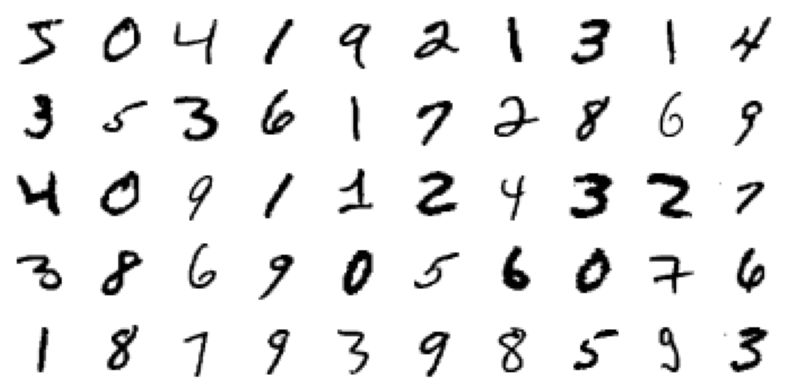

In [38]:
fig, ax = plt.subplots(nrows=5, ncols=10, figsize=(8, 4), subplot_kw={'xticks': [], 'yticks': []})

for row in range(5):
    for col in range(10):
        myid = (10 * row) + col
        ax[row, col].imshow(x_train[myid], cmap=plt.cm.binary)
        ax[row, col].axis('off')

plt.tight_layout()
plt.show()

In [39]:
model = Sequential([
    Flatten(input_shape=(28, 28)),   # Input layer
    Dense(256, activation='relu'),   # Hidden layer 1
    Dropout(0.3),
    Dense(128, activation='relu'),   # Hidden layer 2
    Dropout(0.3),
    Dense(64, activation='relu'),    # Hidden layer 3
    Dense(10, activation='softmax')  # Output layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8290 - loss: 0.5443 - val_accuracy: 0.9627 - val_loss: 0.1204
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.9534 - loss: 0.1592 - val_accuracy: 0.9735 - val_loss: 0.0903
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9628 - loss: 0.1239 - val_accuracy: 0.9731 - val_loss: 0.0864
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9677 - loss: 0.1051 - val_accuracy: 0.9768 - val_loss: 0.0778
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9721 - loss: 0.0916 - val_accuracy: 0.9781 - val_loss: 0.0760
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9731 - loss: 0.0876 - val_accuracy: 0.9790 - val_loss: 0.0715
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9774 - loss: 0.0775 - val_accuracy: 0.9805 - val_loss: 0.0685
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9804 - loss: 0

In [42]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Akurasi Model pada Data Uji: {:.2f}%".format(test_accuracy * 100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9803 - loss: 0.0760
Akurasi Model pada Data Uji: 98.35%


In [43]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [44]:
from sklearn.metrics import confusion_matrix  # for evaluating results
confusion_array = confusion_matrix(y_true, y_pred_classes)
confusion_array

array([[ 971,    0,    1,    1,    0,    0,    5,    0,    1,    1],
       [   0, 1128,    0,    0,    0,    0,    3,    1,    3,    0],
       [   1,    2, 1016,    1,    1,    0,    2,    5,    4,    0],
       [   0,    0,    6,  990,    0,    4,    0,    6,    1,    3],
       [   1,    0,    2,    0,  961,    0,    6,    2,    2,    8],
       [   2,    0,    0,    5,    1,  872,    5,    1,    3,    3],
       [   0,    2,    0,    0,    1,    2,  953,    0,    0,    0],
       [   1,    3,    8,    0,    0,    0,    0, 1009,    1,    6],
       [   3,    0,    4,    3,    3,    2,    3,    4,  948,    4],
       [   1,    2,    0,    1,   10,    4,    0,    1,    3,  987]])

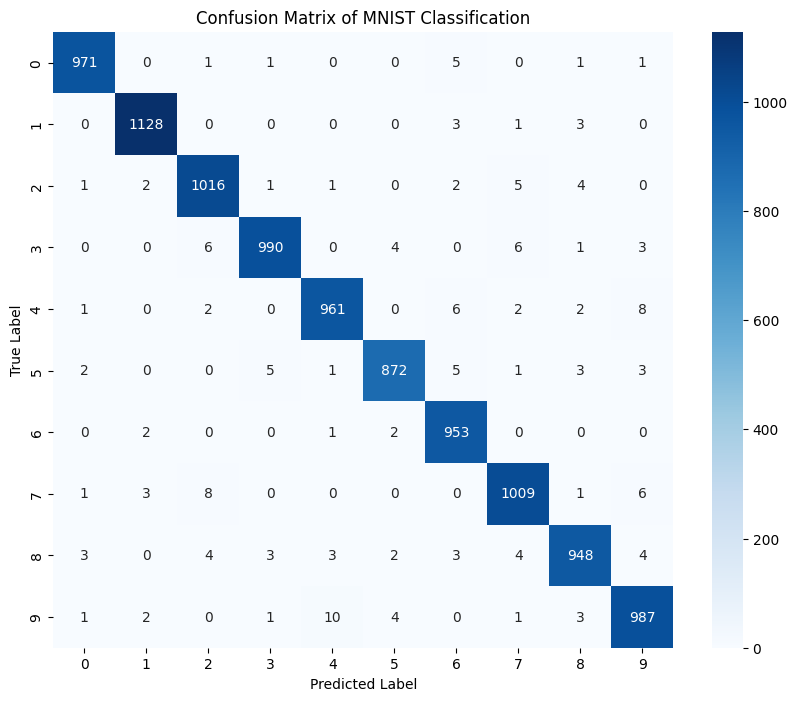

In [45]:
conf_matrix  = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of MNIST Classification")
plt.show()

In [46]:
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



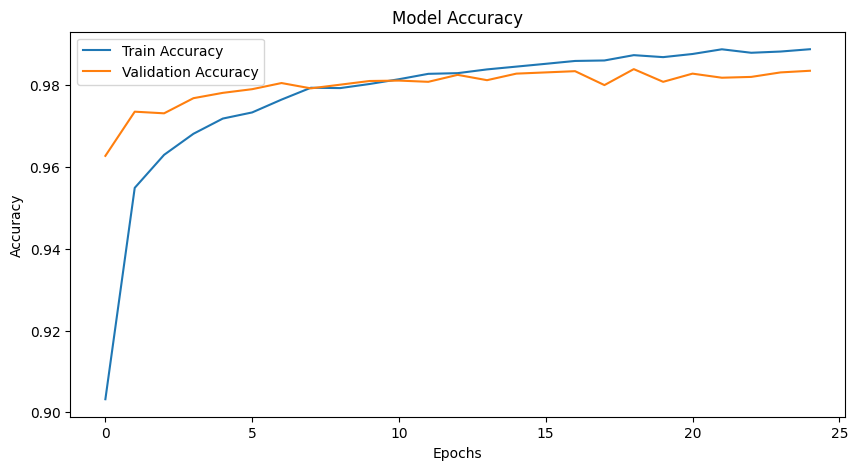

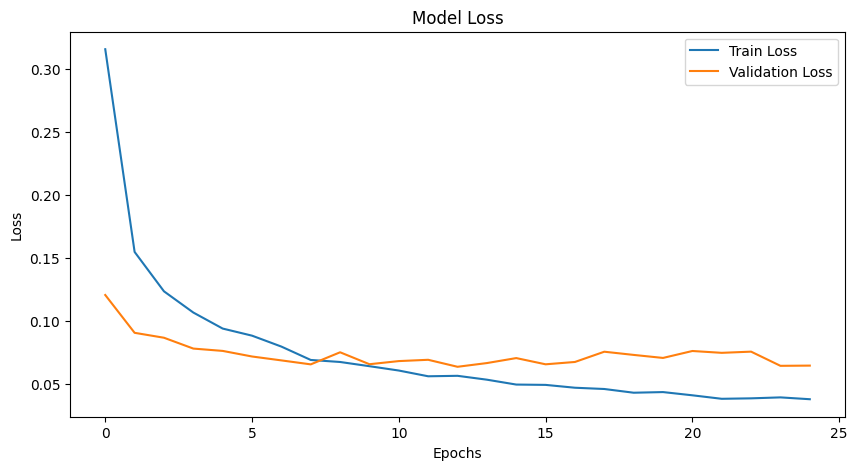

In [47]:
# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()